In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
data.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,41093.000000,58428.000000,62013.000000,60290.000000,28357.000000,0.0
mean,436.400847,7.864223,20.048338,91.765402,200.646951,NaN
std,190.794777,6.899939,11.293746,53.288597,104.656699,NaN
min,44.000000,0.400000,0.500000,2.000000,0.000000,NaN
25%,263.000000,4.500000,13.000000,57.000000,131.000000,NaN
50%,467.000000,6.000000,17.000000,81.000000,184.000000,NaN
75%,583.000000,9.000000,25.000000,112.000000,252.000000,NaN
max,788.000000,228.000000,334.900000,790.000000,1752.000000,NaN


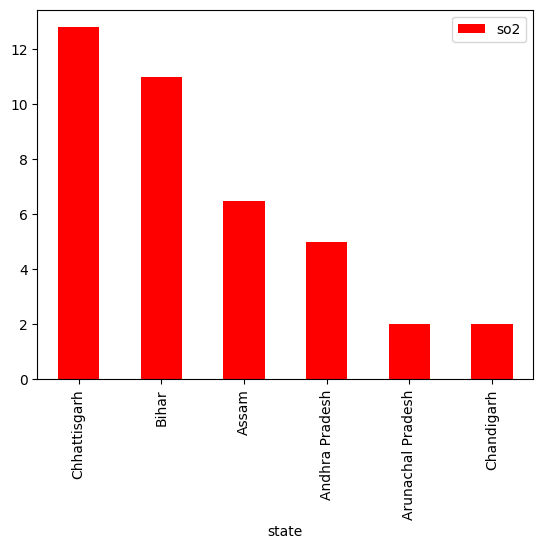

In [9]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).plot.bar(color='r')
plt.show()

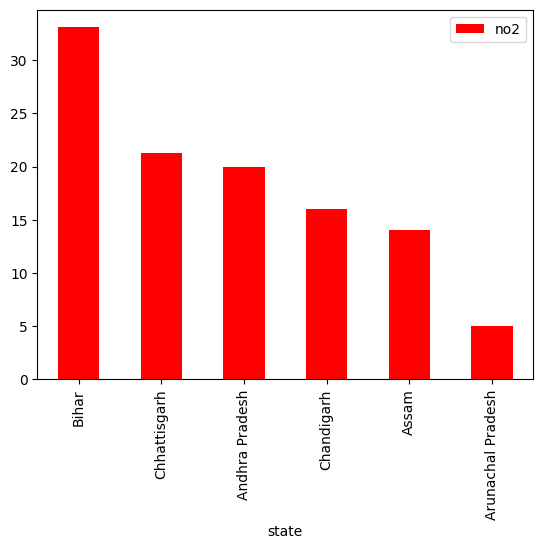

In [11]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).plot.bar(color='r')
plt.show()

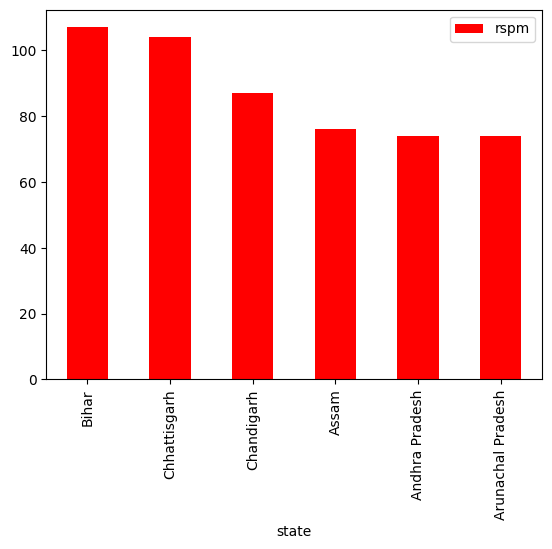

In [13]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).tail(10).plot.bar(color='r')
plt.show()

In [19]:
data['date'] = pd.to_datetime(data['date'],format= '%Y-%m-%d')
data['year'] = data['date'].dt.year
data['year'] = data['year'].fillna(0.0).astype(int)
data= data[(data['year']>0)]


<ipython-input-26-a9081695b83b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


<Axes: xlabel='year', ylabel='so2'>

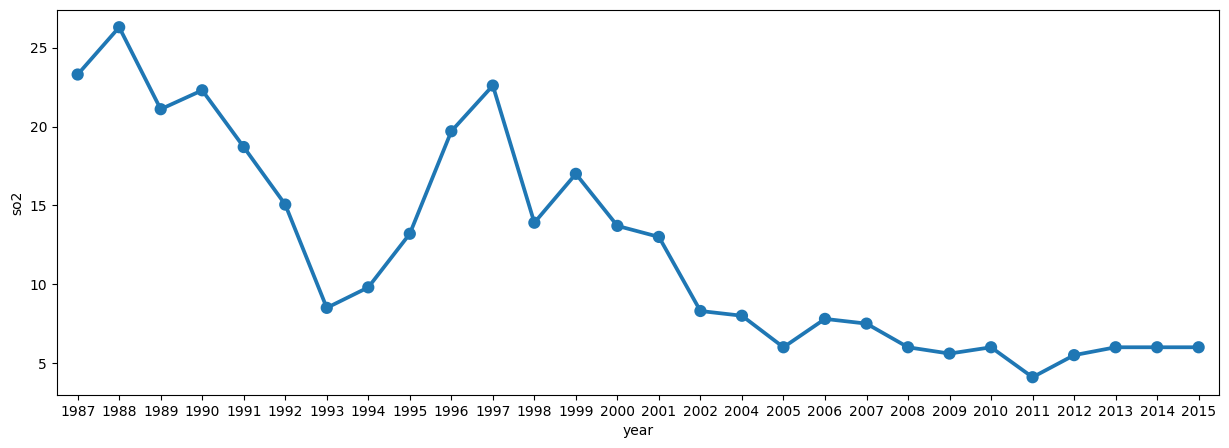

In [26]:
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
plt.subplots(figsize=(15,5))
sns.pointplot(x='year',y='so2',data=df)


<ipython-input-27-904b1fa76a4f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


<Axes: xlabel='year', ylabel='no2'>

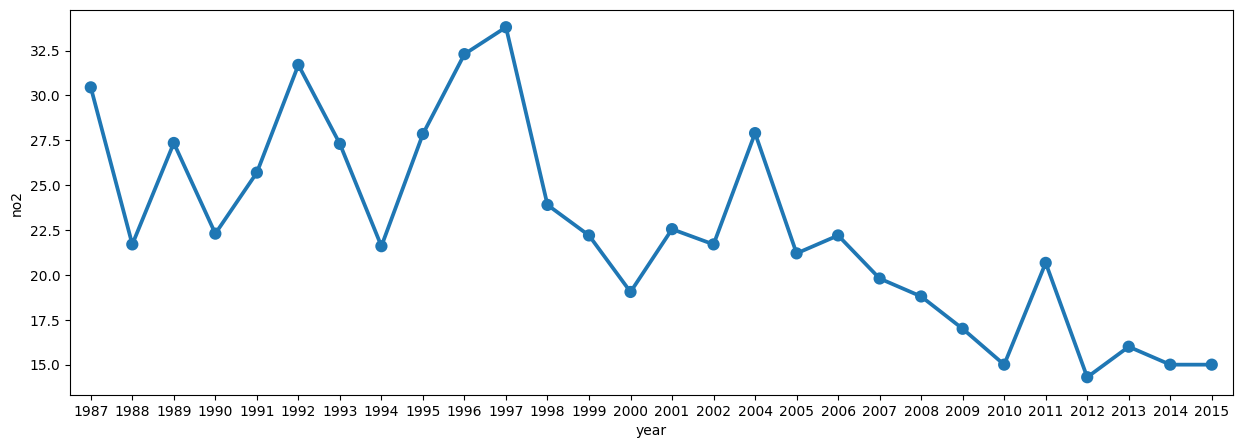

In [27]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
plt.subplots(figsize=(15,5))
sns.pointplot(x='year',y='no2',data=df)
